In [140]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [147]:
Img_file="temp/no_noise.jpg"
img=cv2.imread(Img_file)


In [148]:
def display(Im_path):
    dpi=300
    im_data=plt.imread(Im_path)
    height,width=im_data.shape[:2]
    figsize=(width/float(dpi),height/float(dpi))
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(im_data,cmap='gray')
    plt.show()

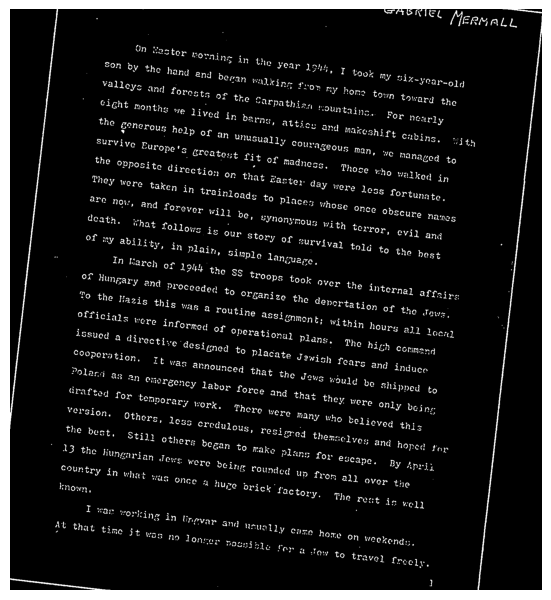

In [150]:
display("temp/no_noise.jpg")

In [151]:
import numpy as np
def GetSkewAngle(Img) -> float:
    new_image=Img.copy()
    gray=cv2.cvtColor(new_image,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(9,9),0)
    thresh=cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(30,5))
    dilate=cv2.dilate(thresh,kernel,iterations=2)
    contours,hiearchy=cv2.findContours(dilate,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    contours=sorted(contours,key=cv2.contourArea,reverse=True)
    for c in contours:
        rect=cv2.boundingRect(c)
        x,y,w,h=rect
        cv2.rectangle(new_image,(x,y),(x+w,y+h),(0,255,0,),2)
    largest_contour=contours[0]
    print(len(largest_contour))    
    min_area_rect=cv2.minAreaRect(largest_contour)
    cv2.imwrite("temp/boxes_01.jpg",new_image)
    angle=min_area_rect[-1]
    #if angle < -45:
      #  angle=90+angle
    return -1.0 * angle
def rotate_Image(Img,angle: float):
    new_image=Img.copy()
    h,w=new_image.shape[:2]
    center=(w//2, h//2)   
    M=cv2.getRotationMatrix2D(center,angle,1.0)
    new_image=cv2.warpAffine(new_image,M,(w,h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
    return new_image

In [152]:
def deskew(image):
    angle=GetSkewAngle(image)
    return rotate_Image(image,-1*angle)

In [161]:
inverted_image=cv2.bitwise_not(img)
cv2.imwrite("temp/inverted_01.jpg",inverted_image)
op=cv2.imread("temp/inverted_01.jpg")

730


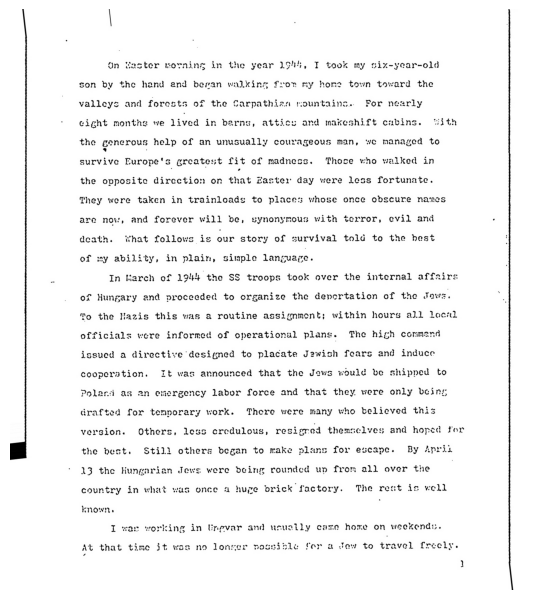

In [162]:
fixed=deskew(op)
cv2.imwrite("temp/deskewed.jpg",fixed)
display("temp/deskewed.jpg")